## Observations and Insights 

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [87]:
# Checking the number of rows in the DataFrame
num_rows = combined_data["Mouse ID"].count()
num_rows

1893

In [3]:
# Checking the number of mice in the DataFrame.
mice_num = len(combined_data["Mouse ID"].unique())
mice_num

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicateRowsDF["Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
clean_df = combined_data[combined_data["Mouse ID"] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
num_clean = len(clean_df["Mouse ID"].unique())
num_clean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
drug_regimen = clean_df.groupby("Drug Regimen")
mean_series = drug_regimen["Tumor Volume (mm3)"].mean()
mean_series
median_series = drug_regimen["Tumor Volume (mm3)"].median()
median_series
variance_series = drug_regimen["Tumor Volume (mm3)"].var()
variance_series
stdv_series = drug_regimen["Tumor Volume (mm3)"].std()
stdv_series
sem_series = drug_regimen["Tumor Volume (mm3)"].sem()
sem_series
stats_df = pd.DataFrame({
    "Mean": mean_series,
    "Median": median_series,
    "Variance": variance_series,
    "Standard Deviation": stdv_series,
    "SEM": sem_series})
stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

drug_regimen2 = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
drug_regimen2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

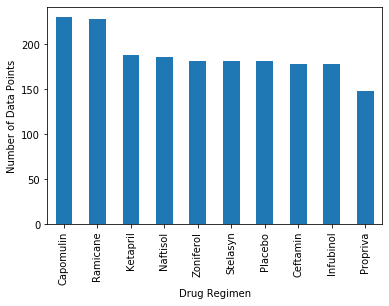

In [10]:
treatment_counts = clean_df["Drug Regimen"].value_counts()
treatment_counts.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Data Points")
plt.show()

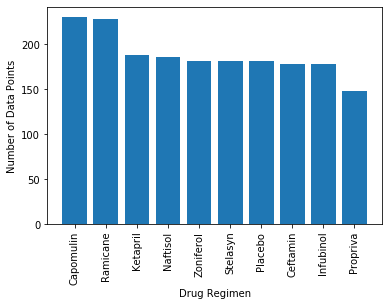

In [11]:
treatment_counts = clean_df["Drug Regimen"].value_counts()
plt.bar(treatment_counts.index.values, treatment_counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

## Pie Plots

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# sex_distribution = clean_df["Sex"].value_counts()
# sex_distribution.plot(kind="pie", autopct="%1.1f%%", title = "Mice Count by Gender")

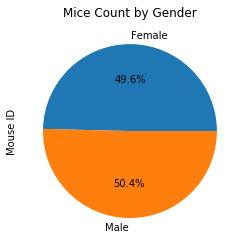

In [13]:
sex_distribution = clean_df.groupby("Sex").nunique()["Mouse ID"]
sex_distribution.plot(kind = "pie", autopct="%1.1f%%", title = "Mice Count by Gender")


In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# plt.pie(sex_distribution.values, autopct="%1.1f%%", labels=labels)
# _=plt.title("Mice Count by Gender")


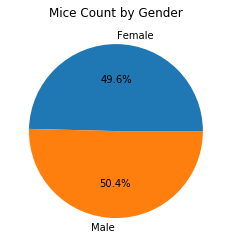

In [15]:
labels = ["Female", "Male"]
plt.pie(sex_distribution, autopct="%1.1f%%", labels=labels)
_=plt.title("Mice Count by Gender")

# Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
all_treatments = clean_df.loc[clean_df["Drug Regimen"].isin(["Ramicane", "Capomulin", "Infubinol", "Ceftamin"])]
treatments_grouped = all_treatments.groupby(["Mouse ID"]).max()
treatments_reset = treatments_grouped.reset_index()
clean_tumor_volume = treatments_reset[["Mouse ID", "Timepoint"]].merge(clean_df, how = "left", on= ["Mouse ID", "Timepoint"])




In [48]:
Ramicane_df = clean_tumor_volume.loc[clean_tumor_volume["Drug Regimen"] == "Ramicane"]
Capomulin_df = clean_tumor_volume.loc[clean_tumor_volume["Drug Regimen"] == "Capomulin"]
Infubinol_df = clean_tumor_volume.loc[clean_tumor_volume["Drug Regimen"] == "Infubinol"]
Ceftamin_df = clean_tumor_volume.loc[clean_tumor_volume["Drug Regimen"]== "Ceftamin"]


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
9,b128,45,Capomulin,Female,9,22,38.982878,2
12,b742,45,Capomulin,Male,7,21,38.939633,0
24,f966,20,Capomulin,Male,16,17,30.485985,0
25,g288,45,Capomulin,Male,3,19,37.074024,1
26,g316,45,Capomulin,Female,22,22,40.159220,2
32,i557,45,Capomulin,Female,1,24,47.685963,1
33,i738,45,Capomulin,Female,23,20,37.311846,2
34,j119,45,Capomulin,Female,7,23,38.125164,1
35,j246,35,Capomulin,Female,21,21,38.753265,1
45,l509,45,Capomulin,Male,17,21,41.483008,3


In [47]:
Ramicane_volume = Ramicane_df["Tumor Volume (mm3)"]
Capomulin_volume = Capomulin_df["Tumor Volume (mm3)"]
Infubinol_volume = Infubinol_df["Tumor Volume (mm3)"]
Ceftamin_volume = Ceftamin_df["Tumor Volume (mm3)"]


9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
51    28.430964
53    33.329098
64    46.539206
65    32.377357
68    41.581521
70    23.343598
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
90    28.484033
96    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# Finding the IQR and outliers for treatment Ramicane
quartiles = Ramicane_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Ramicane tumor volume is: {lowerq}")
print(f"The upper quartile of Ramicane tumor volume is: {upperq}")
print(f"The interquartile range of Ramicane tumor volume is: {iqr}")
print(f"The median of Ramicane tumor volume is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values for Ramicane tumor volume below {lower_bound} could be outliers.")
print(f"Values for Ramicane tumor volume above {upper_bound} could be outliers.")



The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The median of Ramicane tumor volume is: 36.56165229 
Values for Ramicane tumor volume below 17.912664470000003 could be outliers.
Values for Ramicane tumor volume above 54.30681135 could be outliers.


In [20]:
# Finding the IQR and outliers for treatment Capomulin
quartiles = Capomulin_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Capomulin tumor volume is: {lowerq}")
print(f"The upper quartile of Capomulin tumor volume is: {upperq}")
print(f"The interquartile range of Capomulin tumor volume is: {iqr}")
print(f"The median of Capomulin tumor volume is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values for Capomulin tumor volume below {lower_bound} could be outliers.")
print(f"Values for Capomulin tumor volume above {upper_bound} could be outliers.")



The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The median of Capomulin tumor volume is: 38.125164399999996 
Values for Capomulin tumor volume below 20.70456164999999 could be outliers.
Values for Capomulin tumor volume above 51.83201549 could be outliers.


In [21]:
# Finding the IQR and outliers for treatment Infubinol
quartiles = Infubinol_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Infubinol tumor volume is: {lowerq}")
print(f"The upper quartile of Infubinol tumor volume is: {upperq}")
print(f"The interquartile range of Infubinol tumor volume is: {iqr}")
print(f"The median of Infubinol tumor volume is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values for Infubinol tumor volume below {lower_bound} could be outliers.")
print(f"Values for Infubinol tumor volume above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The median of Infubinol tumor volume is: 60.16518046 
Values for Infubinol tumor volume below 36.83290494999999 could be outliers.
Values for Infubinol tumor volume above 82.74144559000001 could be outliers.


In [22]:
# Finding the IQR and outliers for treatment Ceftamin
quartiles = Ceftamin_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Ceftamin tumor volume is: {lowerq}")
print(f"The upper quartile of Ceftamin tumor volume is: {upperq}")
print(f"The interquartile range of Ceftamin tumor volume is: {iqr}")
print(f"The median of Ceftamin tumor volume is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values for Ceftamin tumor volume below {lower_bound} could be outliers.")
print(f"Values for Ceftamin tumor volume above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumor volume is: 48.72207785
The upper quartile of Ceftamin tumor volume is: 64.29983003
The interquartile range of Ceftamin tumor volume is: 15.577752179999997
The median of Ceftamin tumor volume is: 59.85195552 
Values for Ceftamin tumor volume below 25.355449580000002 could be outliers.
Values for Ceftamin tumor volume above 87.66645829999999 could be outliers.


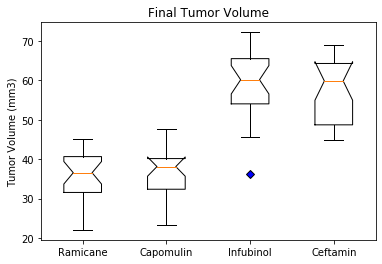

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

treatment_data = [Ramicane_volume, Capomulin_volume, Infubinol_volume, Ceftamin_volume]
treatment_labels = ["Ramicane", "Capomulin", "Infubinol", "Ceftamin"]
fig1, ax1 = plt.subplots()
blue_diamond = dict(markerfacecolor='b', marker='D')
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(treatment_data, labels=treatment_labels, notch=True, flierprops=blue_diamond)
plt.show()




## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume Over Time for Mouse t565 Treated with Capomulin')

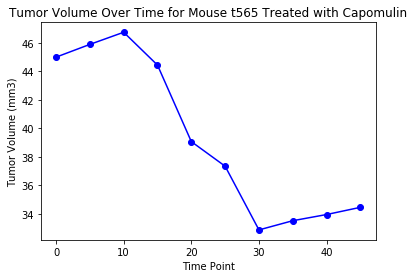

In [80]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_capomulin= clean_df.loc[clean_df["Mouse ID"]== "t565"]
x_axis = mouse_capomulin["Timepoint"]
y_axis = mouse_capomulin["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, marker ='o', color='blue')
mouse_capomulin
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time for Mouse t565 Treated with Capomulin")


Text(0, 0.5, 'Average Tumor Volume')

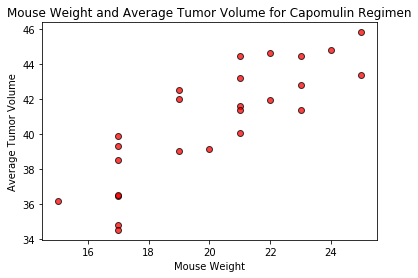

In [111]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Cap_df = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]
Cap_grouped = Cap_df.groupby(["Mouse ID"])
x_values = Cap_grouped["Weight (g)"].mean()
y_values = Cap_grouped["Tumor Volume (mm3)"].mean()
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Mouse Weight and Average Tumor Volume for Capomulin Regimen")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708717


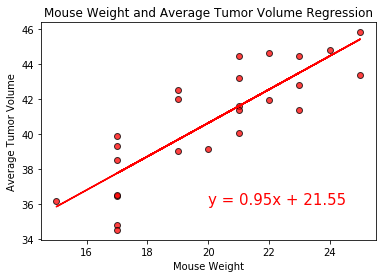

In [106]:
## Correlation and Regression

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 36),fontsize=15,color="red")
plt.title("Mouse Weight and Average Tumor Volume Regression")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()